In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib.lines import Line2D
#from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import TSNE
import seaborn as sns
pd.options.display.max_rows = 5 # to override, use with block: with pd.option_context("display.max_rows", 10):

In [2]:
A = pd.read_csv('../data/FEATURES.csv')
A.head()

,File,IndexStart,IndexEnd,StepsL,StepsR,Ts,SegLen,TimeLen,StepFreqL,StepFreqR,...,EnergyBand_3_15_54,EnergyBand_15_29_54,EnergyBand_3_15_55,EnergyBand_15_29_55,EnergyBand_3_15_56,EnergyBand_15_29_56,EnergyBand_3_15_57,EnergyBand_15_29_57,EnergyBand_3_15_58,EnergyBand_15_29_58
0,N-01-1-Char00part2seg-9_sub_0.csv,58127.0,59961.0,12.0,13.0,0.008,1835.0,14.680,0.817439,0.885559,...,NaN,NaN,0.375840,0.068284,NaN,NaN,NaN,NaN,NaN,NaN
1,A-615829-Char00part1seg-4_sub_1.csv,37215.0,37836.0,3.0,2.0,0.008,622.0,4.976,0.602894,0.401929,...,NaN,NaN,0.419328,0.077711,NaN,NaN,NaN,NaN,NaN,NaN
2,N-25031996-Char00part3seg-2_sub_0.csv,24585.0,26738.0,14.0,14.0,0.008,2154.0,17.232,0.812442,0.812442,...,NaN,NaN,0.419684,0.087584,NaN,NaN,NaN,NaN,NaN,NaN
3,A-766012-Char00part1seg-1_sub_5.csv,5114.0,6533.0,11.0,10.0,0.017,1420.0,24.140,0.455675,0.414250,...,0.379196,0.206181,0.432784,0.161571,0.429657,0.193923,0.429657,0.193923,0.429657,0.193923
4,N-740516-Char00part3seg-0_sub_0.csv,7316.0,8149.0,13.0,12.0,0.017,834.0,14.178,0.916914,0.846382,...,0.422536,0.116652,0.389778,0.103454,0.440059,0.094613,0.440059,0.094613,0.440059,0.094613


In [3]:
A.Type.value_counts()

N    212
A     99
Name: Type, dtype: int64

In [4]:
A.Subject.value_counts()

N-740516-Char00    33
N-535525-Char00    32
                   ..
A-681001-Char00     5
A-13-1-Char00       4
Name: Subject, Length: 22, dtype: int64

### Prepare matrix X with numbers and vector y of types

In [5]:
X = A.copy()
y = np.array(X.Type=='A').astype(int)
X.drop(columns={'Subject','Type','IndexStart','IndexEnd','Ts','SegLen','TimeLen','MaxDir','MinDir','MeanDir','StdDir','StepsL','StepsR'},inplace=True)
X.dropna(axis=1,inplace=True)
X.set_index('File',inplace=True)

In [6]:
X.head()

,StepFreqL,StepFreqR,EnergyBand_3_15_0,EnergyBand_15_29_0,EnergyBand_3_15_1,EnergyBand_15_29_1,EnergyBand_3_15_2,EnergyBand_15_29_2,EnergyBand_3_15_3,EnergyBand_15_29_3,...,EnergyBand_3_15_21,EnergyBand_15_29_21,EnergyBand_3_15_24,EnergyBand_15_29_24,EnergyBand_3_15_28,EnergyBand_15_29_28,EnergyBand_3_15_32,EnergyBand_15_29_32,EnergyBand_3_15_36,EnergyBand_15_29_36
File,,,,,,,,,,,,,,,,,,,,,
N-01-1-Char00part2seg-9_sub_0.csv,0.817439,0.885559,0.355221,0.189428,0.385146,0.245590,0.409115,0.240203,0.350486,0.180774,...,0.380382,0.079673,0.380382,0.079673,0.380382,0.079673,0.380382,0.079673,0.380382,0.079673
A-615829-Char00part1seg-4_sub_1.csv,0.602894,0.401929,0.506192,0.085132,0.442695,0.127328,0.564822,0.144963,0.298850,0.230750,...,0.337415,0.299516,0.337415,0.299516,0.337415,0.299516,0.337415,0.299516,0.337415,0.299516
N-25031996-Char00part3seg-2_sub_0.csv,0.812442,0.812442,0.533281,0.165664,0.504082,0.154384,0.464476,0.206254,0.311460,0.237982,...,0.441981,0.098974,0.441981,0.098974,0.441981,0.098974,0.441981,0.098974,0.441981,0.098974
A-766012-Char00part1seg-1_sub_5.csv,0.455675,0.414250,0.592277,0.173642,0.538505,0.217750,0.524634,0.210781,0.439928,0.268985,...,0.466998,0.159625,0.466998,0.159625,0.466998,0.159625,0.466998,0.159625,0.466998,0.159625
N-740516-Char00part3seg-0_sub_0.csv,0.916914,0.846382,0.480260,0.218803,0.499402,0.311756,0.452750,0.322480,0.380628,0.303668,...,0.374677,0.094806,0.374677,0.094806,0.374677,0.094806,0.374677,0.094806,0.374677,0.094806


# --------------------  DIMENSONALITY REDUCTION  ----------------------------
### for data visualization in 2D

## [1] PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20,svd_solver='arpack')
principalComponents = pca.fit_transform(X) 

In [8]:
principalComponents.shape

(311, 20)

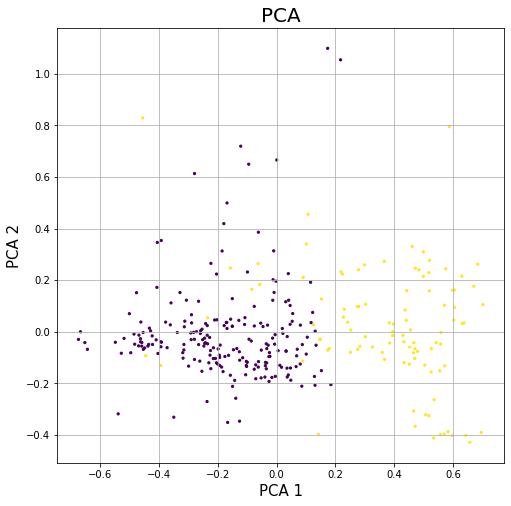

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

ax.scatter(principalComponents[:,0],principalComponents[:,1],c=y,s=5)
ax.grid()

## [2] kernel PCA

In [10]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 20, kernel = 'rbf')

In [11]:
kernelprincipalComponents = kpca.fit_transform(X) 

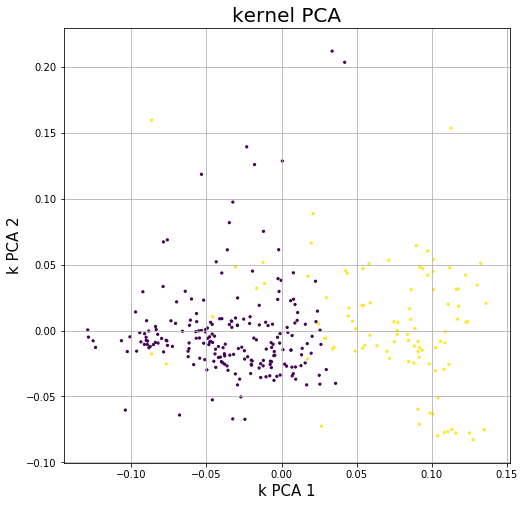

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('k PCA 1', fontsize = 15)
ax.set_ylabel('k PCA 2', fontsize = 15)
ax.set_title('kernel PCA', fontsize = 20)

ax.scatter(kernelprincipalComponents[:,0],kernelprincipalComponents[:,1],c=y,s=5)
ax.grid()

## [3] t-SNE

In [13]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(311, 2)

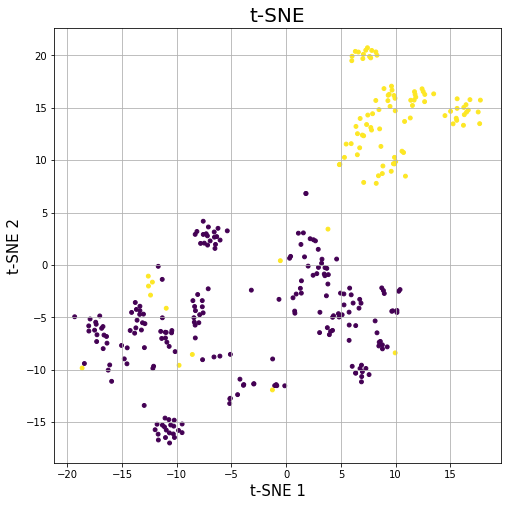

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE 1', fontsize = 15)
ax.set_ylabel('t-SNE 2', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)

ax.scatter(X_embedded[:,0],X_embedded[:,1],c=y,s=15)
ax.grid()

## [4] ANOTHER PACKAGE:
### scanpy (PCA, t-SNE, uMAP)

In [15]:
import scanpy as sc
import warnings

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

adata = sc.AnnData(X=X)
adata

scanpy==1.4.3 anndata==0.6.21 umap==0.3.9 numpy==1.15.4 scipy==1.2.2 pandas==0.24.2 scikit-learn==0.21.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


AnnData object with n_obs × n_vars = 311 × 52 

In [16]:
num_neighbors = 10

In [17]:
adata.obs_names = X.index.to_list()

In [18]:
adata.obs['Disease'] = y
adata.obs['Disease'].value_counts()

0    212
1     99
Name: Disease, dtype: int64

In [19]:
adata.obs['sample'] = A.Subject.to_list()

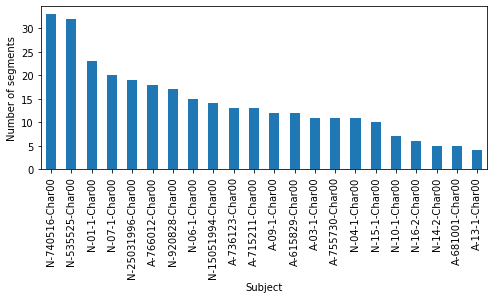

In [20]:
ax = adata.obs['sample'].value_counts().plot.bar(figsize=(8,3));
ax.set_ylabel('Number of segments')
ax.set_xlabel('Subject');

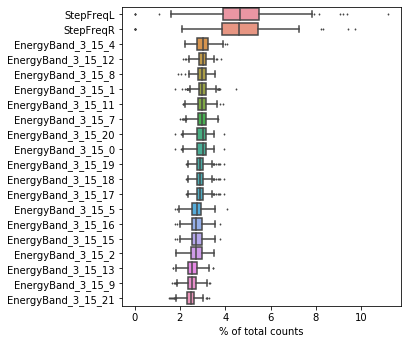

In [21]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [22]:
sc.tl.pca(adata,n_comps=20, svd_solver='arpack')

computing PCA with n_comps = 20
    finished (0:00:00.00)


... storing 'sample' as categorical


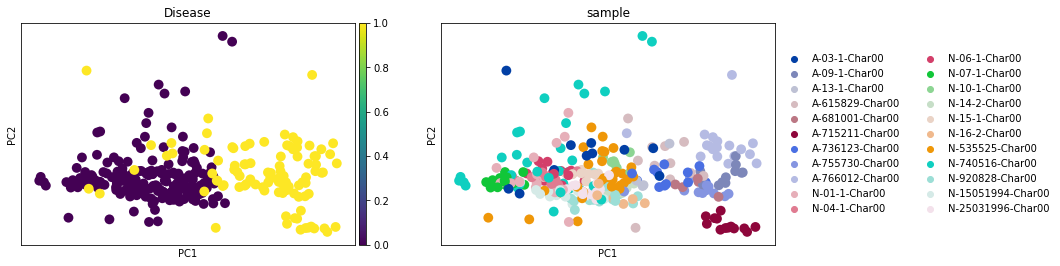

In [23]:
sc.pl.pca(adata, color=['Disease', 'sample'])

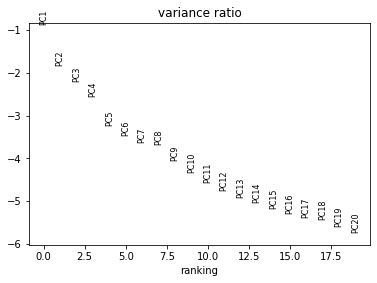

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 20
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:01.63) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [26]:
sc.pp.neighbors(adata, n_neighbors=num_neighbors, n_pcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 10


/Users/tupa/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:283: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/tupa/anaconda3/envs/py36/lib/python3.6/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../anaconda3/envs/py36/lib/python3.6/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Users/tupa/anaconda3/envs/py36/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../

    finished (0:00:02.03) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [27]:
sc.tl.umap(adata)

computing UMAP
    using 'X_pca' with n_pcs = 10


/Users/tupa/anaconda3/envs/py36/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


    finished (0:00:01.92) --> added
    'X_umap', UMAP coordinates (adata.obsm)


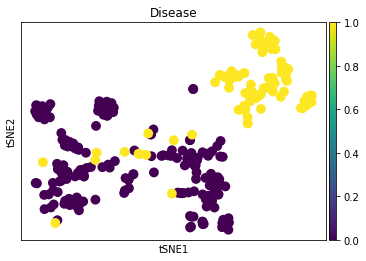

In [28]:
sc.pl.tsne(adata, color=['Disease'])

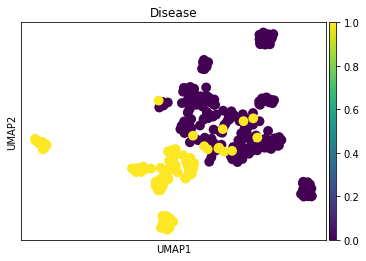

In [29]:
sc.pl.umap(adata, color=['Disease'])

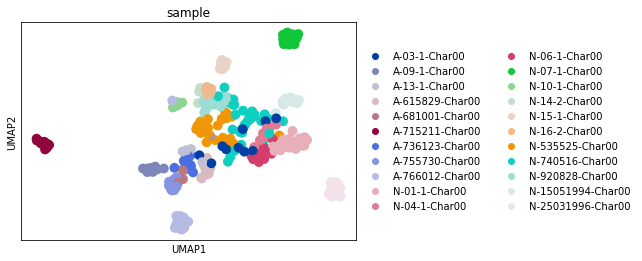

In [30]:
sc.pl.umap(adata, color=['sample'], hspace=2)

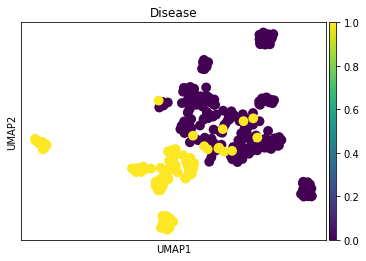

In [31]:
sc.pl.umap(adata, color=['Disease'])

# ----------------------------  CLASSIFICATION  ----------------------------
### supervised learning

## [A] DATA SPLIT TO TRAIN AND TEST SET

#### BALANCING THE DATASET TO SAME AMOUNT OF SAMPLES
see this for documentation of SMOTE over-sampling:
https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

In [32]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

Using TensorFlow backend.


In [33]:
X.shape

(311, 52)

In [34]:
sum(y==1)

99

In [35]:
X_resampled.shape

(424, 52)

In [36]:
sum(y_resampled==1)

212

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

## [B] DATA PREPROCESSING: FEATURE SCALING

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## [C] CLASSIFICATION

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
from confusion_matrix_pretty_print import *

In [41]:
def show_results_plot_cm(y_train,y_pred_train,y_test,y_pred):
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    target_names = ['Norma', 'Ataxia']
    print('CLASSIFICATION RESULTS ON TRAINING SET')
    print(classification_report(y_train, y_pred_train, target_names=target_names))
    print('CLASSIFICATION RESULTS ON TEST SET')
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    columns = ['Norma','Ataxia']
    cmap = 'Oranges';
    plot_confusion_matrix_from_data(y_test, y_pred, columns, cmap)

### [1] Logistic regression

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       0.99      1.00      1.00       173
      Ataxia       1.00      0.99      1.00       166

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       1.00      1.00      1.00        39
      Ataxia       1.00      1.00      1.00        46

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



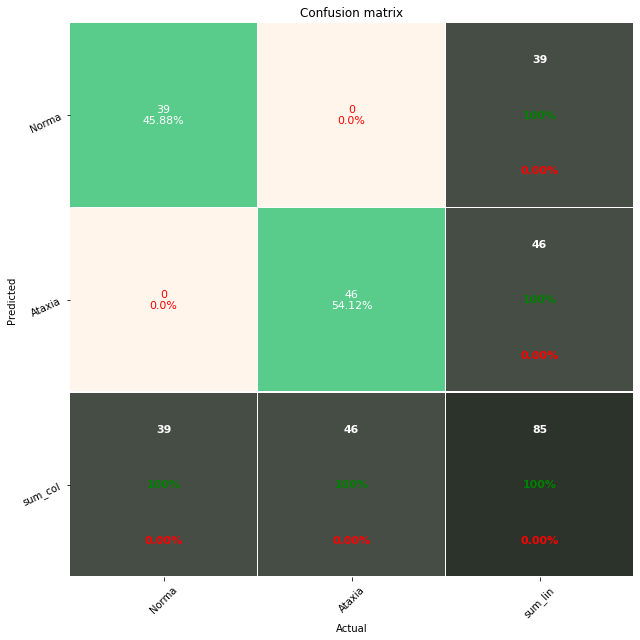

In [42]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='lbfgs')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

### [2] k-NN classifier

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       0.98      0.99      0.99       173
      Ataxia       0.99      0.98      0.99       166

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       1.00      1.00      1.00        39
      Ataxia       1.00      1.00      1.00        46

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



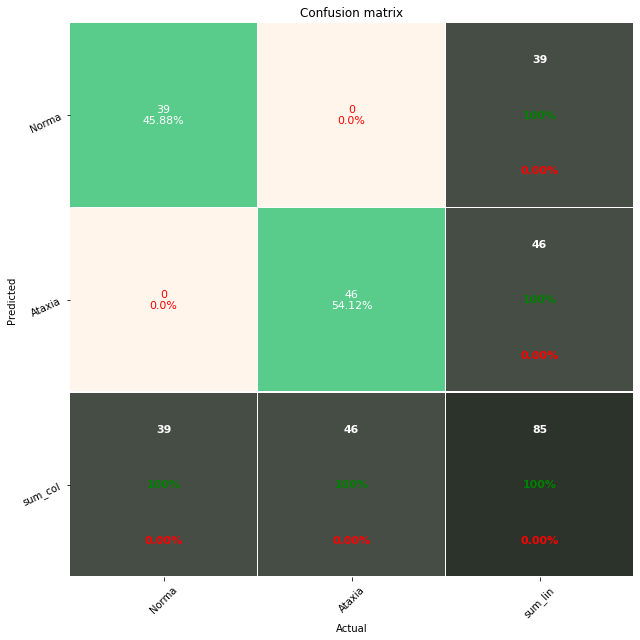

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

### [3] SVM - linear classifier

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       1.00      1.00      1.00       173
      Ataxia       1.00      1.00      1.00       166

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       0.97      1.00      0.99        39
      Ataxia       1.00      0.98      0.99        46

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85



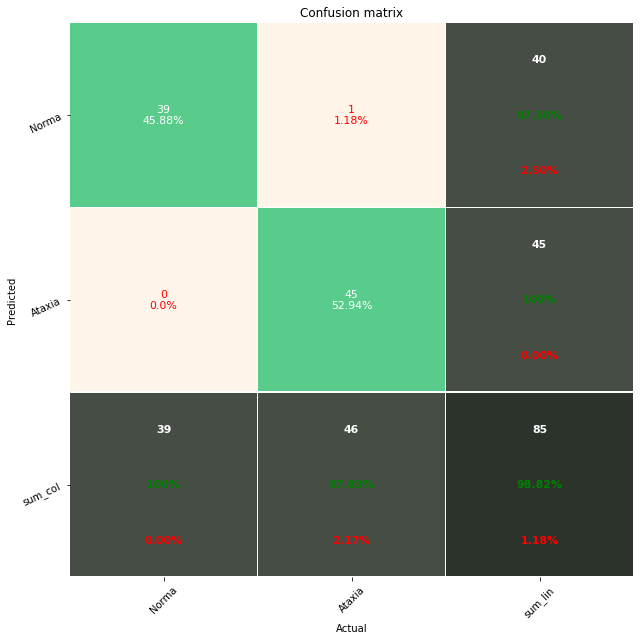

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

### [4] SVM - rbf kernel

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       1.00      1.00      1.00       173
      Ataxia       1.00      1.00      1.00       166

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       1.00      1.00      1.00        39
      Ataxia       1.00      1.00      1.00        46

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



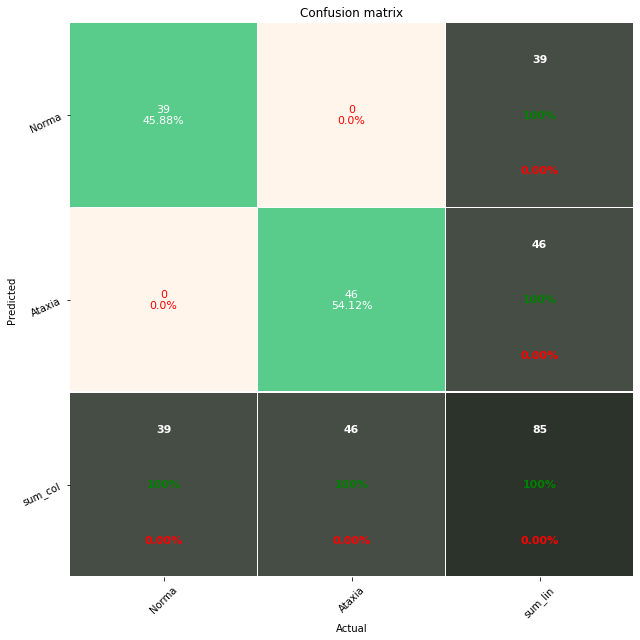

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

### [5] Naive Bayes

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       0.91      0.98      0.95       173
      Ataxia       0.98      0.90      0.94       166

    accuracy                           0.94       339
   macro avg       0.95      0.94      0.94       339
weighted avg       0.95      0.94      0.94       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       0.88      0.97      0.93        39
      Ataxia       0.98      0.89      0.93        46

    accuracy                           0.93        85
   macro avg       0.93      0.93      0.93        85
weighted avg       0.93      0.93      0.93        85



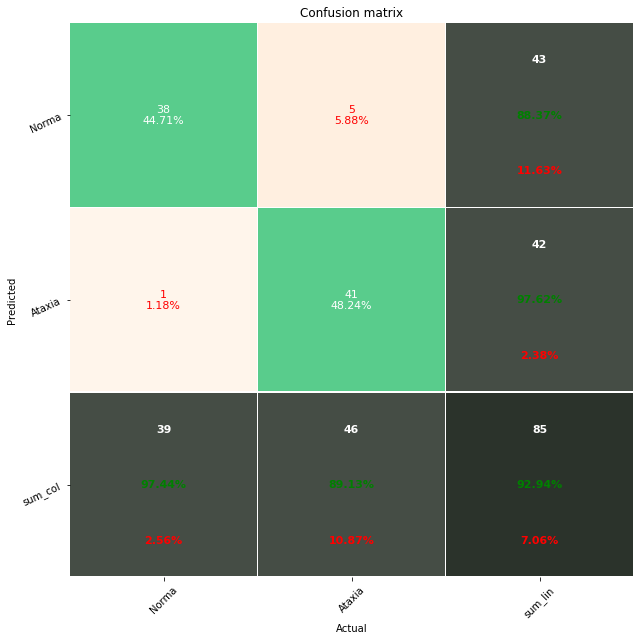

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

### [6] Decision Tree

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       1.00      1.00      1.00       173
      Ataxia       1.00      1.00      1.00       166

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       0.93      0.97      0.95        39
      Ataxia       0.98      0.93      0.96        46

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



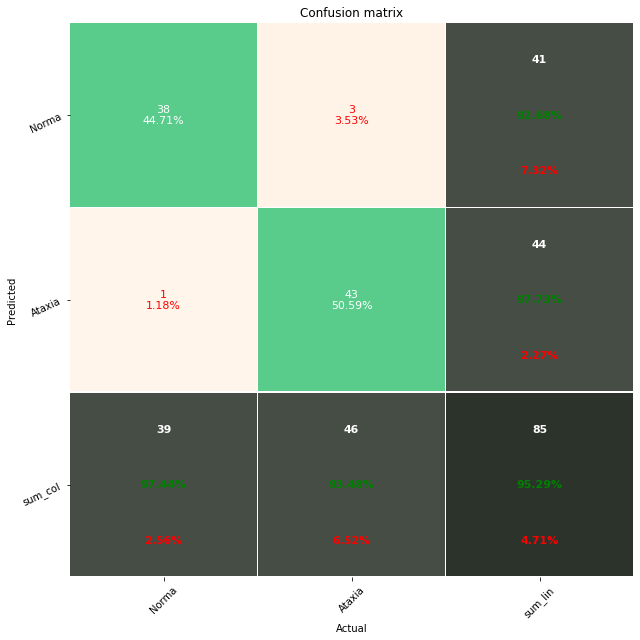

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

### [7] Random forrest

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       0.99      1.00      1.00       173
      Ataxia       1.00      0.99      1.00       166

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       0.97      0.95      0.96        39
      Ataxia       0.96      0.98      0.97        46

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



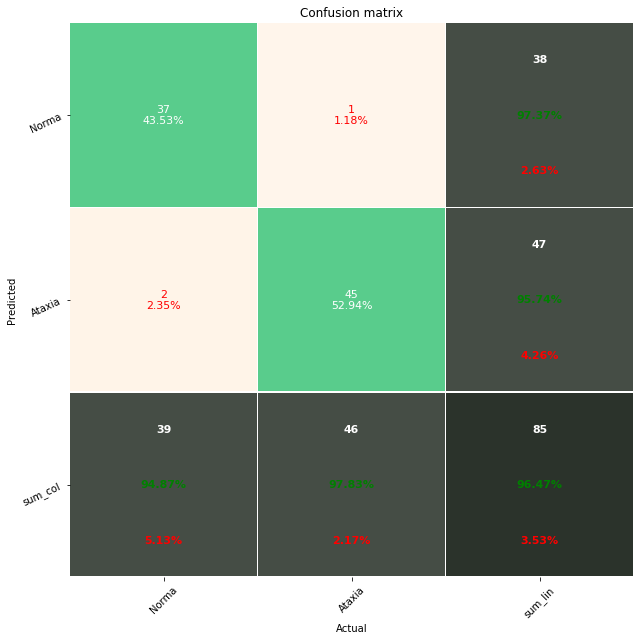

In [48]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

### [8] Artificial neural network

CLASSIFICATION RESULTS ON TRAINING SET
              precision    recall  f1-score   support

       Norma       1.00      0.99      0.99       173
      Ataxia       0.99      1.00      0.99       166

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339

CLASSIFICATION RESULTS ON TEST SET
              precision    recall  f1-score   support

       Norma       1.00      0.97      0.99        39
      Ataxia       0.98      1.00      0.99        46

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85



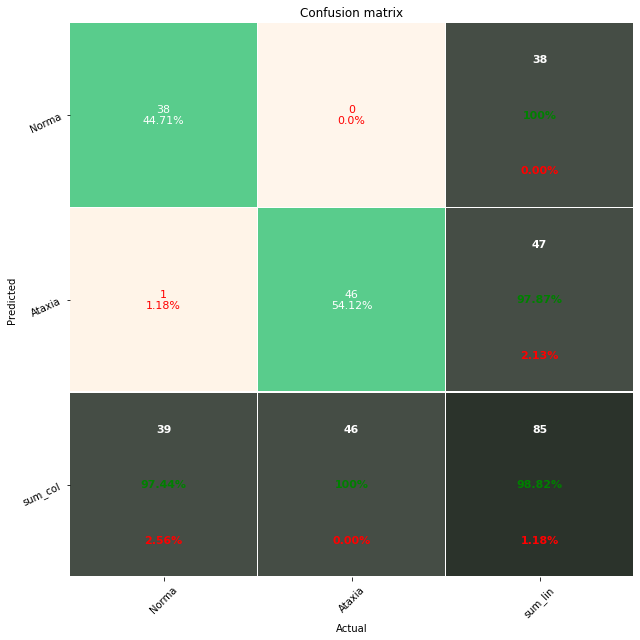

In [49]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = np.size(X_train,axis=1)))

## Adding the second hidden layer
#classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose=False)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Predicting the Training set resultst)
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

show_results_plot_cm(y_train,y_pred_train,y_test,y_pred)

# COMPARISON OF CLASSIFIERS

In [61]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["LogisticRegression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(random_state = 0,solver='lbfgs'),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    SVC(kernel = 'linear', random_state = 0),
    SVC(kernel = 'rbf', random_state = 0),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
    MLPClassifier(alpha=1, max_iter=100),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [62]:
score = np.empty(len(classifiers))
i=0
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score[i] = clf.score(X_test, y_test)
    i+=1

/Users/tupa/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tupa/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tupa/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Text(0.5, 1.0, 'ACCURACY')

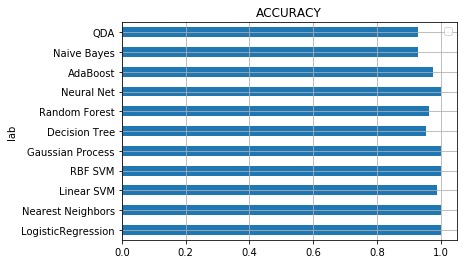

In [63]:
df = pd.DataFrame({'lab':names, 'accuracy':score})
ax = df.plot.barh(x='lab', y='accuracy', rot=0)
ax.legend([])
ax.grid()
ax.set_title('ACCURACY')